### About Dataset
* Created the dataset to analyze the performance of all the players playing in CWC 2019
* The data is scraped from ESPN Cricinfo
* Matches till 18th May 2019 are only counted.

### Import Libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# load datasets
df_batsman = pd.read_csv('../input/cricket-world-cup-2019-players-data/Batsman_Data.csv')
df_bowler = pd.read_csv('../input/cricket-world-cup-2019-players-data/Bowler_data.csv')
df_ground_avg = pd.read_csv('../input/cricket-world-cup-2019-players-data/Ground_Averages.csv')
df_match_results = pd.read_csv('../input/cricket-world-cup-2019-players-data/ODI_Match_Results.csv')
df_match_totals = pd.read_csv('../input/cricket-world-cup-2019-players-data/ODI_Match_Totals.csv')
df_wc_players = pd.read_csv('../input/cricket-world-cup-2019-players-data/WC_players.csv')


In [3]:
# batsman 1st 5 records
df_batsman.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


In [4]:
# bowler 1st 5 records
df_bowler.head()

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,-,-,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619


In [5]:
# ground Averages 1st 5 records
df_ground_avg.head()

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,"Eden Gardens, Kolkata - India",2013-2017,4,4,0,0,2161,72,2297,30.01,5.64
1,"Feroz Shah Kotla, Delhi - India",2013-2019,4,4,0,0,1789,75,2331,23.85,4.60
2,Melbourne Cricket Ground - Australia,2013-2019,15,15,0,0,7656,217,8482,35.28,5.41
3,"Saurashtra Cricket Association Stadium, Rajkot...",2013-2015,2,2,0,0,1163,26,1200,44.73,5.81
4,Adelaide Oval - Australia,2013-2019,10,10,0,0,4863,157,5645,30.97,5.16


In [6]:
# ODI Match Results 1st 5 records
df_match_results.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,121,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [7]:
# ODI Match Totals 1st 5 records
df_match_totals.head()

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,413,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,681,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,117,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [8]:
# World Cup Players 1st 5 records
df_wc_players.head()

,Player,ID,Country
0,Gulbadin Naib (c),352048,Afghanistan
1,Rashid Khan (vc),793463,Afghanistan
2,Aftab Alam,440963,Afghanistan
3,Asghar Afghan,320652,Afghanistan
4,Dawlat Zadran,516561,Afghanistan


### Data Preprocessing:

In [9]:
# Overview of Batsman Dataset
def dataoverview(df_batsman, message):
    print(f'{message}:\n')
    print("Rows:", df_batsman.shape[0])
    print("\n Number of features:", df_batsman.shape[1])
    print("\n Features:")
    print(df_batsman.columns.tolist())
    print("\n Missing Values:", df_batsman.isna().sum().values.sum())
    print("\n Unique Values:")
    print(df_batsman.nunique())
    
dataoverview(df_batsman, 'Overiew of the Batsman Dataset')

Overiew of the Batsman Dataset:

Rows: 11149

 Number of features: 13

 Features:
['Unnamed: 0', 'Bat1', 'Runs', 'BF', 'SR', '4s', '6s', 'Opposition', 'Ground', 'Start Date', 'Match_ID', 'Batsman', 'Player_ID']

 Missing Values: 0

 Unique Values:
Unnamed: 0    11149
Bat1            323
Runs            180
BF              163
SR             2032
4s               26
6s               17
Opposition       22
Ground          134
Start Date     1625
Match_ID       1844
Batsman         149
Player_ID       150
dtype: int64


In [10]:
# Overview of Bowler Dataset

def dataoverview(df_bowler, message):
    print(f'{message}:\n')
    print("Rows:", df_bowler.shape[0])
    print("\n Number of features:", df_bowler.shape[1])
    print("\n Features:")
    print(df_bowler.columns.tolist())
    print("\n Missing Values:", df_bowler.isna().sum().values.sum())
    print("\n Unique Values:")
    print(df_batsman.nunique())
    
dataoverview(df_bowler, 'Overiew of the Bowler Dataset')

Overiew of the Bowler Dataset:

Rows: 11118

 Number of features: 14

 Features:
['Unnamed: 0', 'Overs', 'Mdns', 'Runs', 'Wkts', 'Econ', 'Ave', 'SR', 'Opposition', 'Ground', 'Start Date', 'Match_ID', 'Bowler', 'Player_ID']

 Missing Values: 0

 Unique Values:
Unnamed: 0    11149
Bat1            323
Runs            180
BF              163
SR             2032
4s               26
6s               17
Opposition       22
Ground          134
Start Date     1625
Match_ID       1844
Batsman         149
Player_ID       150
dtype: int64


In [11]:
# Overview of Ground Averges Dataset

def dataoverview(df_ground_avg, message):
    print(f'{message}:\n')
    print("Rows:", df_ground_avg.shape[0])
    print("\n Number of features:", df_ground_avg.shape[1])
    print("\n Features:")
    print(df_ground_avg.columns.tolist())
    print("\n Missing Values:", df_ground_avg.isna().sum().values.sum())
    print("\n Unique Values:")
    print(df_ground_avg.nunique())
    
dataoverview(df_ground_avg, 'Overiew of the Ground Averges dataset')

Overiew of the Ground Averges dataset:

Rows: 106

 Number of features: 11

 Features:
['Ground', 'Span', 'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts', 'Balls', 'Ave', 'RPO']

 Missing Values: 0

 Unique Values:
Ground    106
Span       20
Mat        23
Won        22
Tied        3
NR          4
Runs      106
Wkts       80
Balls     103
Ave       105
RPO        87
dtype: int64


In [12]:
# Overview of ODI Match Results Dataset

def dataoverview(df_match_results, message):
    print(f'{message}:\n')
    print("Rows:", df_match_results.shape[0])
    print("\n Number of features:", df_match_results.shape[1])
    print("\n Features:")
    print(df_match_results.columns.tolist())
    print("\n Missing Values:", df_match_results.isna().sum().values.sum())
    print("\n Unique Values:")
    print(df_match_results.nunique())
    
dataoverview(df_ground_avg, 'Overiew of the ODI Match Results dataset')

Overiew of the ODI Match Results dataset:

Rows: 106

 Number of features: 11

 Features:
['Ground', 'Span', 'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts', 'Balls', 'Ave', 'RPO']

 Missing Values: 0

 Unique Values:
Ground    106
Span       20
Mat        23
Won        22
Tied        3
NR          4
Runs      106
Wkts       80
Balls     103
Ave       105
RPO        87
dtype: int64


In [13]:
# Overview of ODI Worldcup Dataset

def dataoverview(df_wc_players, message):
    print(f'{message}:\n')
    print("Rows:", df_wc_players.shape[0])
    print("\n Number of features:", df_wc_players.shape[1])
    print("\n Features:")
    print(df_wc_players.columns.tolist())
    print("\n Missing Values:", df_wc_players.isna().sum().values.sum())
    print("\n Unique Values:")
    print(df_wc_players.nunique())
    
dataoverview(df_wc_players, 'Overiew of the ODI Worldcup dataset')

Overiew of the ODI Worldcup dataset:

Rows: 152

 Number of features: 3

 Features:
['Player', 'ID', 'Country']

 Missing Values: 0

 Unique Values:
Player     152
ID         152
Country     10
dtype: int64


### Batsman Performance Analysis:

In [14]:
df_batsman.dtypes

Unnamed: 0     int64
Bat1          object
Runs          object
BF            object
SR            object
4s            object
6s            object
Opposition    object
Ground        object
Start Date    object
Match_ID      object
Batsman       object
Player_ID      int64
dtype: object

In [15]:
df_batsman.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


In [16]:
# Dropping players who did not batted
df_batsman = df_batsman[~df_batsman['Bat1'].isin(['TDNB', 'DNB','absent','sub'])]

In [17]:
df_batsman.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
5,6,0*,0,8,0.00,0,0,v India,Dhaka,10 Jan 2010,ODI # 2941,Oshane Thomas,49619
6,7,0*,0,0,-,0,0,v England,The Oval,28 Jun 2011,ODI # 3165,Oshane Thomas,49619
9,10,1*,1,3,33.33,0,0,v England,Nottingham,6 Jul 2011,ODI # 3169,Oshane Thomas,49619
10,11,0*,0,2,0.00,0,0,v Australia,Pallekele,10 Aug 2011,ODI # 3175,Oshane Thomas,49619
11,12,0,0,2,0.00,0,0,v Pakistan,Dubai (DSC),11 Nov 2011,ODI # 3212,Oshane Thomas,49619


In [18]:
# Change datatypes of columns and remove string data from dataset
df_batsman['Bat1'] = df_batsman['Bat1'].str.replace('*', '.').astype(float)
df_batsman['SR'] = df_batsman['SR'].str.replace('-', '0').astype(float)
df_batsman['Runs'] = df_batsman['Runs'].str.replace('-', '0').astype(float)
df_batsman['4s'] = df_batsman['4s'].str.replace('-', '0').astype(float)
df_batsman['6s'] = df_batsman['6s'].str.replace('-', '0').astype(float)

In [19]:
df_batsman.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
5,6,0.0,0.0,8,0.00,0.0,0.0,v India,Dhaka,10 Jan 2010,ODI # 2941,Oshane Thomas,49619
6,7,0.0,0.0,0,0.00,0.0,0.0,v England,The Oval,28 Jun 2011,ODI # 3165,Oshane Thomas,49619
9,10,1.0,1.0,3,33.33,0.0,0.0,v England,Nottingham,6 Jul 2011,ODI # 3169,Oshane Thomas,49619
10,11,0.0,0.0,2,0.00,0.0,0.0,v Australia,Pallekele,10 Aug 2011,ODI # 3175,Oshane Thomas,49619
11,12,0.0,0.0,2,0.00,0.0,0.0,v Pakistan,Dubai (DSC),11 Nov 2011,ODI # 3212,Oshane Thomas,49619


In [20]:
df_batsman.dtypes

Unnamed: 0      int64
Bat1          float64
Runs          float64
BF             object
SR            float64
4s            float64
6s            float64
Opposition     object
Ground         object
Start Date     object
Match_ID       object
Batsman        object
Player_ID       int64
dtype: object

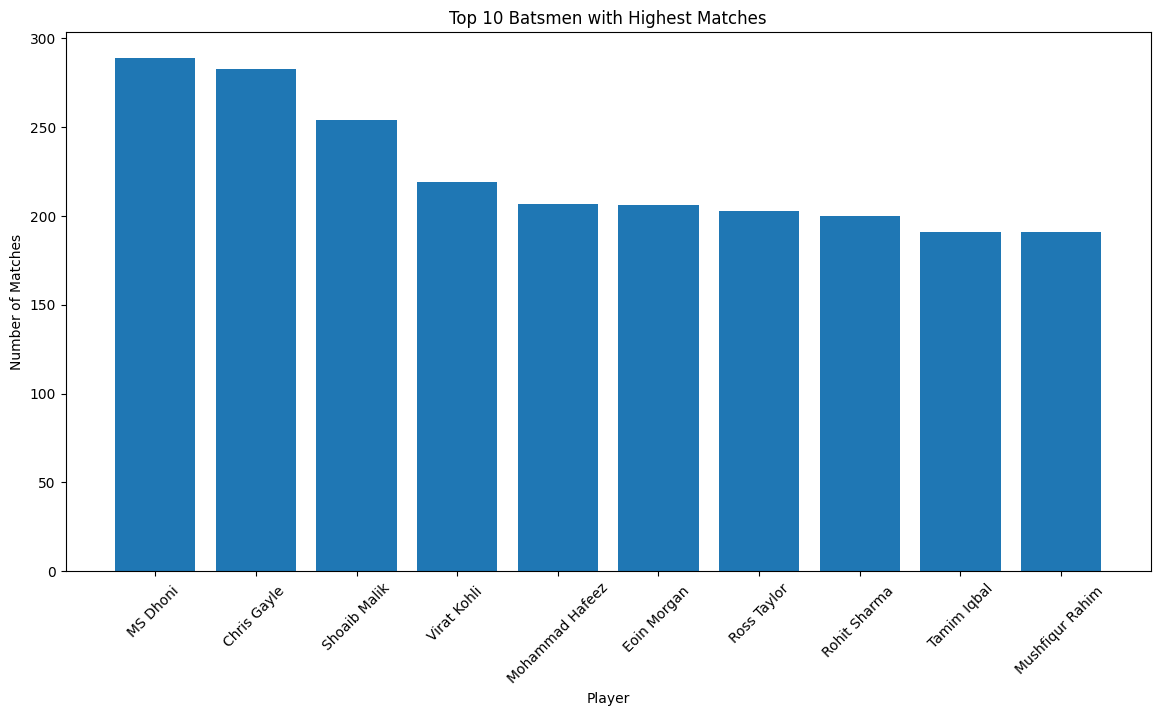

In [21]:
#Top 10 batsmen with highest macthes
top_10_players = df_batsman['Batsman'].value_counts()[:10]

# Create a bar graph
plt.figure(figsize=(14, 7))  
plt.bar(top_10_players.index, top_10_players.values)
plt.xlabel('Player')
plt.ylabel('Number of Matches')
plt.title('Top 10 Batsmen with Highest Matches')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

plt.show()

In [22]:
#Gathering Data of required Batsman induvidually
ind_batsman = df_batsman.query("Batsman =='Mohammad Hafeez'")
ind_batsman

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
3442,3443,12.0,12.0,18,66.66,2.0,0.0,v Zimbabwe,Sharjah,3 Apr 2003,ODI # 1994,Mohammad Hafeez,41434
3443,3444,50.0,50.0,103,48.54,3.0,0.0,v Sri Lanka,Sharjah,4 Apr 2003,ODI # 1995,Mohammad Hafeez,41434
3444,3445,36.0,36.0,58,62.06,4.0,1.0,v Kenya,Sharjah,8 Apr 2003,ODI # 1999,Mohammad Hafeez,41434
3445,3446,2.0,2.0,9,22.22,0.0,0.0,v Zimbabwe,Sharjah,10 Apr 2003,ODI # 2000,Mohammad Hafeez,41434
3446,3447,53.0,53.0,114,46.49,2.0,0.0,v Sri Lanka,Dambulla,10 May 2003,ODI # 2008,Mohammad Hafeez,41434
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,3646,71.0,71.0,63,112.69,8.0,2.0,v South Africa,Port Elizabeth,19 Jan 2019,ODI # 4080,Mohammad Hafeez,41434
3646,3647,9.0,9.0,11,81.81,1.0,0.0,v South Africa,Durban,22 Jan 2019,ODI # 4081,Mohammad Hafeez,41434
3647,3648,52.0,52.0,45,115.55,6.0,1.0,v South Africa,Centurion,25 Jan 2019,ODI # 4084,Mohammad Hafeez,41434
3649,3650,17.0,17.0,28,60.71,1.0,0.0,v South Africa,Cape Town,30 Jan 2019,ODI # 4090,Mohammad Hafeez,41434


In [23]:
#Gathering some important data from the required Batsman
print("The highest number of score for this batsman is: ")
print(ind_batsman['Runs'].max())
print("The highest Strike Rate for this batsman is: ")
print(ind_batsman['SR'].max())
print("The most number of 4s for this batsman is: ")
print(ind_batsman['4s'].max())
print("The most number of 6s score for this batsman is: ")
print(ind_batsman['6s'].max())

The highest number of score for this batsman is: 
140.0
The highest Strike Rate for this batsman is: 
154.05
The most number of 4s for this batsman is: 
13.0
The most number of 6s score for this batsman is: 
5.0


In [24]:
#Getting the data of a particular batsman against a particular Team
againstaustralia = ind_batsman.query('Opposition == "v Australia"')
againstaustralia

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
3464,3465,0.0,0.0,9,0.00,0.0,0.0,v Australia,Hobart,16 Jan 2005,ODI # 2205,Mohammad Hafeez,41434
3466,3467,13.0,13.0,36,36.11,0.0,0.0,v Australia,Sydney,23 Jan 2005,ODI # 2209,Mohammad Hafeez,41434
3468,3469,13.0,13.0,39,33.33,2.0,0.0,v Australia,Melbourne,4 Feb 2005,ODI # 2220,Mohammad Hafeez,41434
3469,3470,6.0,6.0,25,24.00,1.0,0.0,v Australia,Sydney,6 Feb 2005,ODI # 2222,Mohammad Hafeez,41434
3511,3512,5.0,5.0,8,62.50,1.0,0.0,v Australia,Colombo (RPS),19 Mar 2011,ODI # 3139,Mohammad Hafeez,41434
3546,3547,4.0,4.0,12,33.33,0.0,0.0,v Australia,Sharjah,28 Aug 2012,ODI # 3299,Mohammad Hafeez,41434
3547,3548,23.0,23.0,27,85.18,2.0,0.0,v Australia,Abu Dhabi,31 Aug 2012,ODI # 3301,Mohammad Hafeez,41434
3548,3549,78.0,78.0,97,80.41,4.0,2.0,v Australia,Sharjah,3 Sep 2012,ODI # 3303,Mohammad Hafeez,41434
3619,3620,4.0,4.0,7,57.14,0.0,0.0,v Australia,Brisbane,13 Jan 2017,ODI # 3817,Mohammad Hafeez,41434
3620,3621,72.0,72.0,104,69.23,8.0,0.0,v Australia,Melbourne,15 Jan 2017,ODI # 3818,Mohammad Hafeez,41434


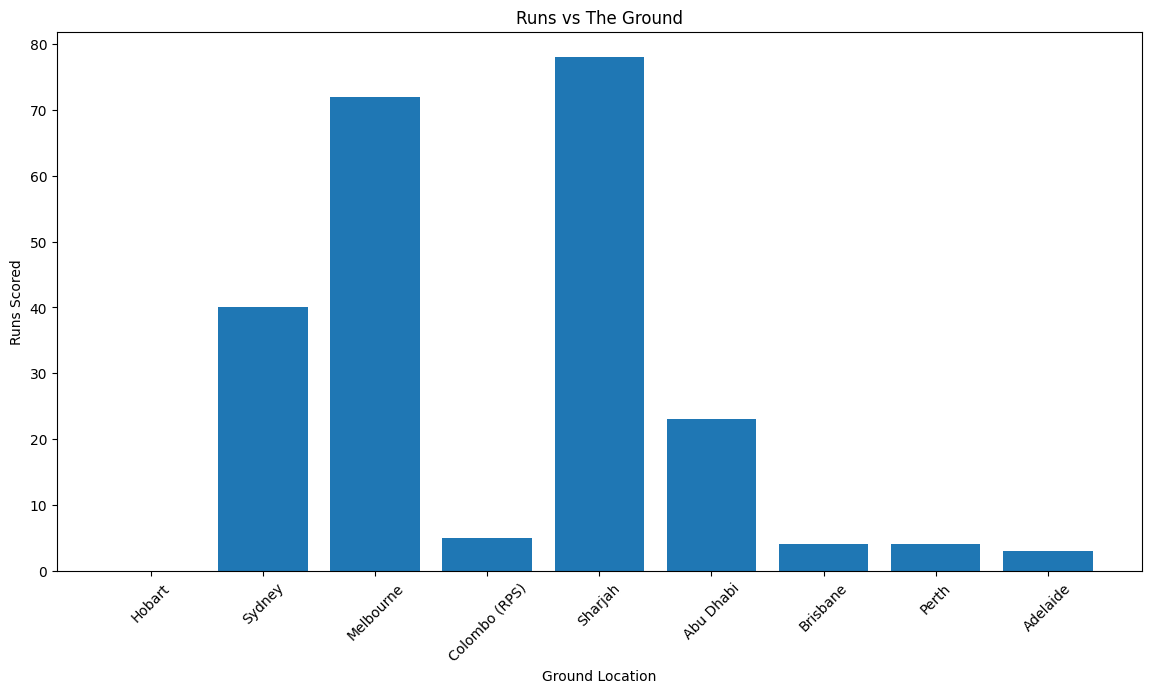

In [25]:
plt.figure(figsize=(14,7))
x = againstaustralia['Ground']
y = againstaustralia['Runs']
plt.xlabel('Ground Location')
plt.ylabel('Runs Scored')
plt.title('Runs vs The Ground')
plt.bar(x, y)
plt.xticks(rotation=45)
plt.show()

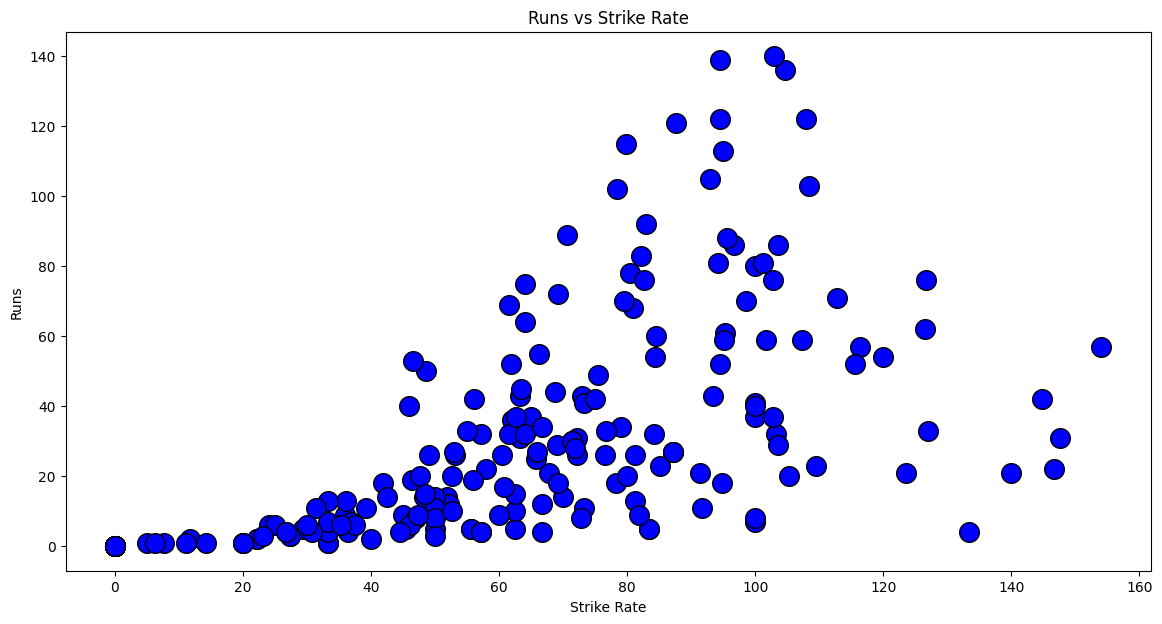

In [26]:
# Batsman strike rate vs the score in each match

plt.figure(figsize=(14,7))
x = ind_batsman['SR']
y = ind_batsman['Runs']
plt.xlabel('Strike Rate')
plt.ylabel('Runs')
plt.title('Runs vs Strike Rate')
plt.scatter(x, y, color='blue', s=200, edgecolor='black')
plt.show()

### Bowler Performance Analysis:

In [27]:
df_bowler.head()

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,-,-,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619


In [28]:
df_bowler.dtypes

Unnamed: 0     int64
Overs         object
Mdns          object
Runs          object
Wkts          object
Econ          object
Ave           object
SR            object
Opposition    object
Ground        object
Start Date    object
Match_ID      object
Bowler        object
Player_ID      int64
dtype: object

In [29]:
# Change datatypes of columns and remove string data from dataset
df_bowler['Overs'] = df_bowler['Overs'].str.replace('-', '0').astype(float)
df_bowler['Mdns'] = df_bowler['Mdns'].str.replace('-', '0').astype(float)
df_bowler['Runs'] = df_bowler['Runs'].str.replace('-', '0').astype(float)
df_bowler['Wkts'] = df_bowler['Wkts'].str.replace('-', '0').astype(float)
df_bowler['Econ'] = df_bowler['Econ'].str.replace('-', '0').astype(float)
df_bowler['Ave'] = df_bowler['Ave'].str.replace('-', '0').astype(float)
df_bowler['SR'] = df_bowler['SR'].str.replace('-', '0').astype(float)

In [30]:
df_bowler.dtypes

Unnamed: 0      int64
Overs         float64
Mdns          float64
Runs          float64
Wkts          float64
Econ          float64
Ave           float64
SR            float64
Opposition     object
Ground         object
Start Date     object
Match_ID       object
Bowler         object
Player_ID       int64
dtype: object

In [31]:
df_bowler.head()

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0.0,57.0,0.0,7.12,0.0,0.0,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0.0,55.0,2.0,5.50,27.5,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,0.0,0.0,0.0,0.0,0.00,0.0,0.0,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619
3,4,9.0,1.0,63.0,2.0,7.00,31.5,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1.0,48.0,0.0,6.00,0.0,0.0,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619


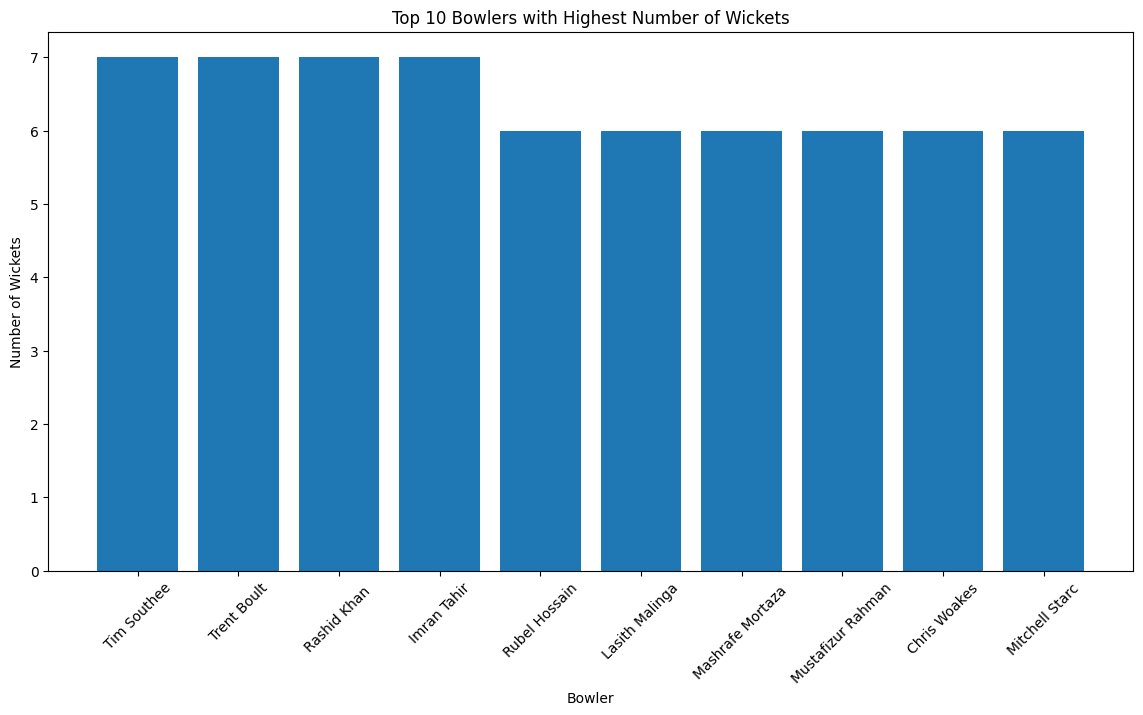

In [32]:
# Top 10 Bowler having most wickets in 2019 World Cup
top_10_bowlers = df_bowler.sort_values(by='Wkts', ascending=False).head(10)

plt.figure(figsize=(14, 7))
plt.bar(top_10_bowlers['Bowler'], top_10_bowlers['Wkts'])
plt.xlabel('Bowler')
plt.ylabel('Number of Wickets')
plt.title('Top 10 Bowlers with Highest Number of Wickets')
plt.xticks(rotation=45)
plt.show()


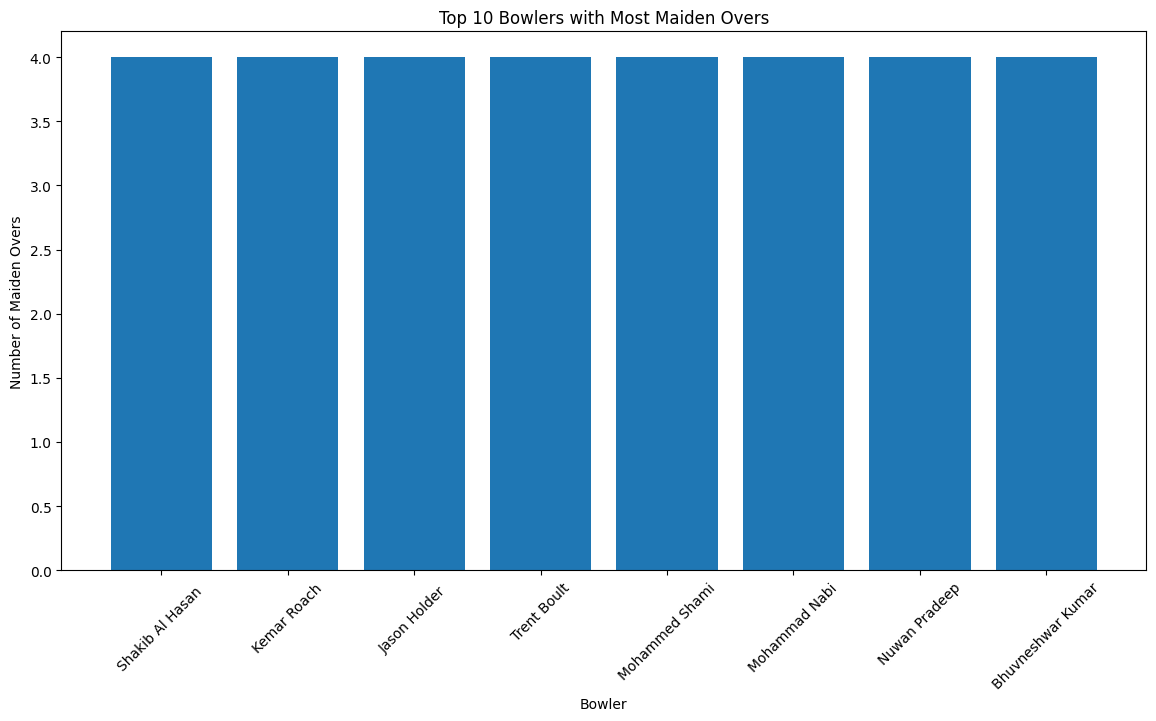

In [33]:
# Find the highest number of Maiden Overs
top_10_maiden_bowlers = df_bowler.sort_values(by='Mdns', ascending=False).head(10)

plt.figure(figsize=(14, 7))
plt.bar(top_10_maiden_bowlers['Bowler'], top_10_maiden_bowlers['Mdns'])
plt.xlabel('Bowler')
plt.ylabel('Number of Maiden Overs')
plt.title('Top 10 Bowlers with Most Maiden Overs')
plt.xticks(rotation=45)
plt.show()


In [34]:
# Find the maximum overs and corresponding bowlers with lowest economy
max_overs = df_bowler['Overs'].max()
bowlers_max_overs = df_bowler[df_bowler['Overs'] == max_overs]
min_economy = bowlers_max_overs['Econ'].min()
bowlers_min_economy = bowlers_max_overs[bowlers_max_overs['Econ'] == min_economy]

f"Max Overs: {max_overs}, Lowest Economy among bowlers with {max_overs} overs: {min_economy}"
bowlers_min_economy


,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
9099,9100,10.0,4.0,11.0,3.0,1.1,3.66,20.0,v Zimbabwe,Dhaka,19 Jan 2009,ODI # 2797,Shakib Al Hasan,56143


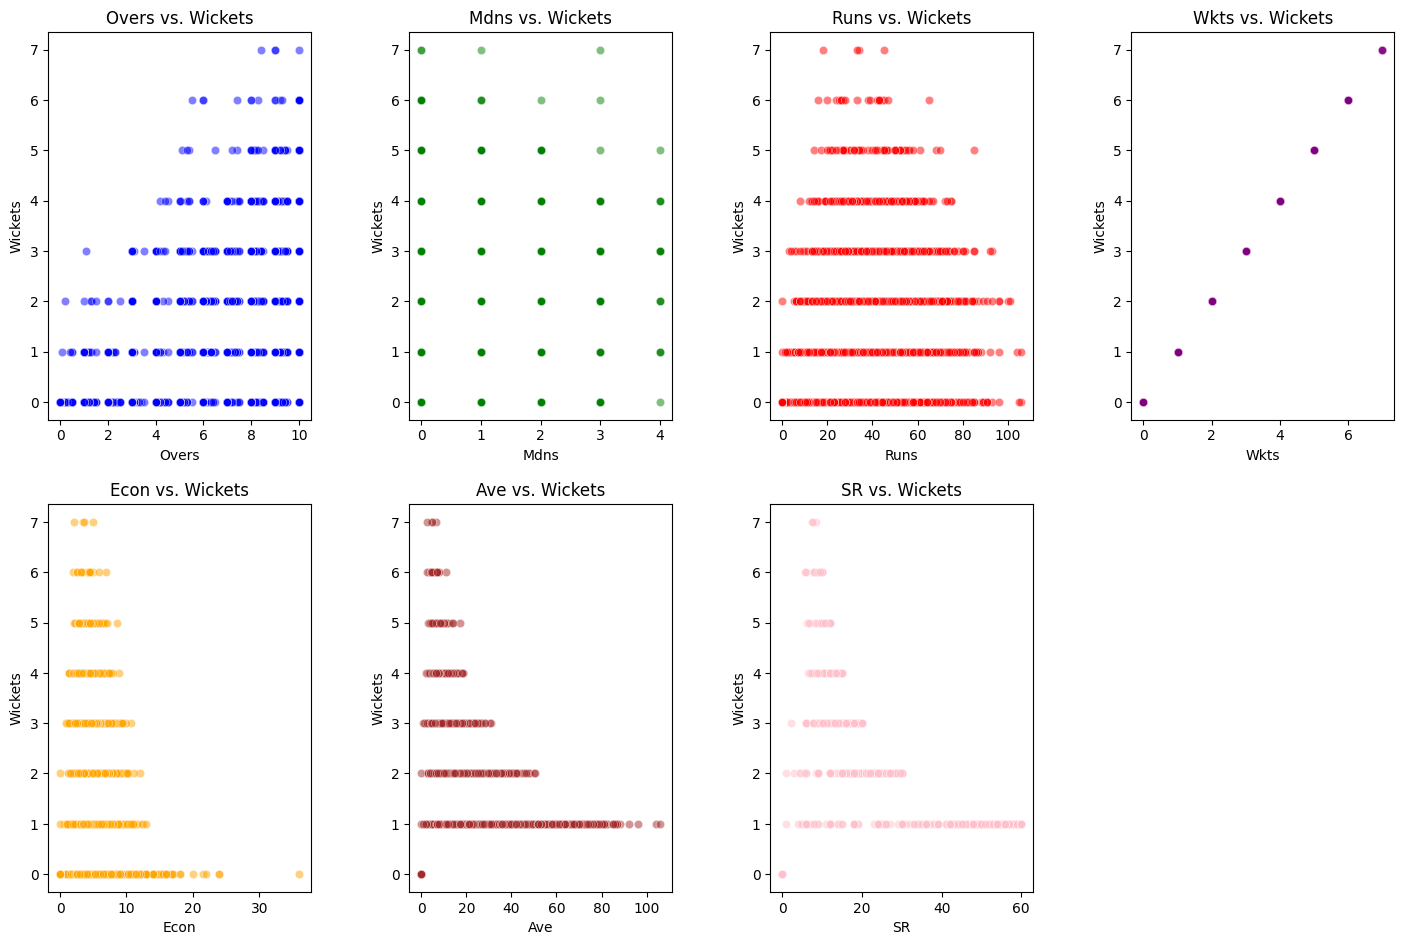

In [35]:
# Scatter Plot
cols = ['Overs', 'Mdns', 'Runs', 'Wkts', 'Econ', 'Ave', 'SR']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink']

# Set subplot grid dimensions
rows, cols_grid = len(cols) // 4 + 1, 4

# Create subplots grid
fig, axes = plt.subplots(rows, cols_grid, figsize=(15, 10))
fig.tight_layout(pad=4.0)

# Create scatter plots for each column with different colors
for i, (col, color) in enumerate(zip(cols, colors)):
    r, c = i // cols_grid, i % cols_grid
    sns.scatterplot(data=df_bowler, x=col, y='Wkts', alpha=0.5, ax=axes[r, c], color=color)
    axes[r, c].set_xlabel(col)
    axes[r, c].set_ylabel('Wickets')
    axes[r, c].set_title(f'{col} vs. Wickets')

# Remove any empty subplots
for i in range(len(cols), rows * cols_grid):
    fig.delaxes(axes.flatten()[i])

plt.show()
